# Aufgabe 10:



as-22july06.graph
NetworKit.Graph(n=22963, m=48436)
Gesamtlaufzeit von ParK in ns:  8505600
	Laufzeiten der drei ParK Läufe in ns:
	 3998500
	 3001800
	 1505300
	Arithmetisches Mittel:  2835200

Gesamtlaufzeit von Bucket-PQ in ns:  8505600
	Laufzeiten der drei Bucket-PQ Läufe in ns:
	 4012900
	 1000100
	 1003600
	Arithmetisches Mittel:  2005533.3333333333


belgium.osm.graph
NetworKit.Graph(n=1441295, m=1549970)
Gesamtlaufzeit von ParK in ns:  371595800
	Laufzeiten der drei ParK Läufe in ns:
	 122505500
	 121694600
	 127395700
	Arithmetisches Mittel:  123865266.66666667

Gesamtlaufzeit von Bucket-PQ in ns:  371595800
	Laufzeiten der drei Bucket-PQ Läufe in ns:
	 254038600
	 240997400
	 226237400
	Arithmetisches Mittel:  240424466.66666666


citationCiteseer.graph
NetworKit.Graph(n=268495, m=1156647)
Gesamtlaufzeit von ParK in ns:  153725300
	Laufzeiten der drei ParK Läufe in ns:
	 52290700
	 52828400
	 48606200
	Arithmetisches Mittel:  51241766.666666664

Gesamtlaufzeit von Bucket-PQ

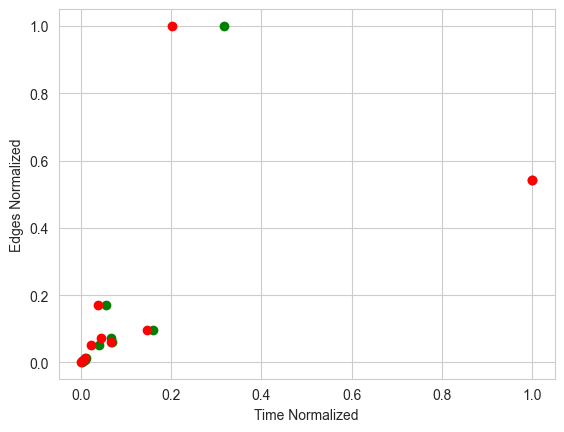

In [1]:
import os
import statistics
import time

import matplotlib.pyplot as plt
import networkit as nk
from networkit import centrality

files = list()

timeDivEdgeParKX = list()
timeDivEdgeParKY = list()
timeDivEdgeBucketX = list()
timeDivEdgeBucketY = list()

for file in os.listdir("./graphs"):
    if file.endswith(".graph"):
        T1_start = time.time()
        G: nk.Graph = nk.readGraph("./graphs/" + file, nk.Format.METIS)

        laeufe_ParK = list()
        laeufe_PQ = list()
        
        a: nk.centrality.CoreDecomposition = nk.centrality.CoreDecomposition(G)

        T2_start = time.time_ns()
        for i in range(3):
            T3_start = time.time_ns()
            a: nk.centrality.CoreDecomposition = a.run()
            T3_end = time.time_ns()
            laeufe_ParK.append(T3_end - T3_start)
        T2_end = time.time_ns()
        
        
        b: nk.centrality.CoreDecomposition = nk.centrality.CoreDecomposition(G, enforceBucketQueueAlgorithm=True)
        
        T4_start = time.time_ns()
        for i in range(3):
            T5_start = time.time_ns()
            b: nk.centrality.CoreDecomposition = b.run()
            T5_end = time.time_ns()
            laeufe_PQ.append(T5_end - T5_start)
        T4_end = time.time_ns()
        
        T1_end = time.time_ns()

        

        timeDivEdgeParKX.append(statistics.mean(laeufe_ParK))
        timeDivEdgeParKY.append(G.numberOfEdges())
        
        timeDivEdgeBucketX.append(statistics.mean(laeufe_PQ))
        timeDivEdgeBucketY.append(G.numberOfEdges())

        print()
        print()
        print(file)
        print(G)

        print("Gesamtlaufzeit von ParK in ns: ", T2_end - T2_start)
        print("\tLaufzeiten der drei ParK Läufe in ns:")
        for ts in laeufe_ParK:
            print("\t",ts)
        print("\tArithmetisches Mittel: ", statistics.mean(laeufe_ParK))
        print()
        print("Gesamtlaufzeit von Bucket-PQ in ns: ", T2_end - T2_start)
        print("\tLaufzeiten der drei Bucket-PQ Läufe in ns:")
        for ts in laeufe_PQ:
            print("\t",ts)
        print("\tArithmetisches Mittel: ", statistics.mean(laeufe_PQ))

plt.xlabel("Time Normalized")
plt.ylabel("Edges Normalized")

print(timeDivEdgeParKX)
print(timeDivEdgeParKY)

print(timeDivEdgeBucketX)
print(timeDivEdgeBucketY)

timeDivEdgeParKX = [float(i)/max(timeDivEdgeParKX) for i in timeDivEdgeParKX]
timeDivEdgeParKY = [float(i)/max(timeDivEdgeParKY) for i in timeDivEdgeParKY]

timeDivEdgeBucketX = [float(i)/max(timeDivEdgeBucketX) for i in timeDivEdgeBucketX]
timeDivEdgeBucketY = [float(i)/max(timeDivEdgeBucketY) for i in timeDivEdgeBucketY]

for x in range(len(timeDivEdgeParKX)):
    plt.scatter(timeDivEdgeParKX[x], timeDivEdgeParKY[x], c="g")
for x in range(len(timeDivEdgeBucketX)):
    plt.scatter(timeDivEdgeBucketX[x], timeDivEdgeBucketY[x], c="r")
